# Aula 16 - Introdução à Ciência de Dados

Nesta aula vamos começar a utilizar ferramentas de Data Science para carregar dados, gerar estatísticas e gráficos.

Vamos ver algumas funcionalidades da biblioteca pandas (https://pandas.pydata.org/) e do seaborn (https://seaborn.pydata.org/)

Neste momento aprenderemos apenas as técnicas de **Análise Exploratória**, que é o momento onde carregamos e entedemos os tipos de dados que temos. Os próximos passos em um pipeline de Data Science envolvem encontrar modelos de Aprendizado de Máquina (regressão, classificação, agrupamento, redução de dimensionalidade, etc) que sejam adequados aos nossos propósitos (resolvam os problemas que queremos). Vamos aprender a usar essas técnicas nas próximas aulas.

--------------------------

## Exemplo 1 - Entomologia: Gafanhatos vs Esperanças

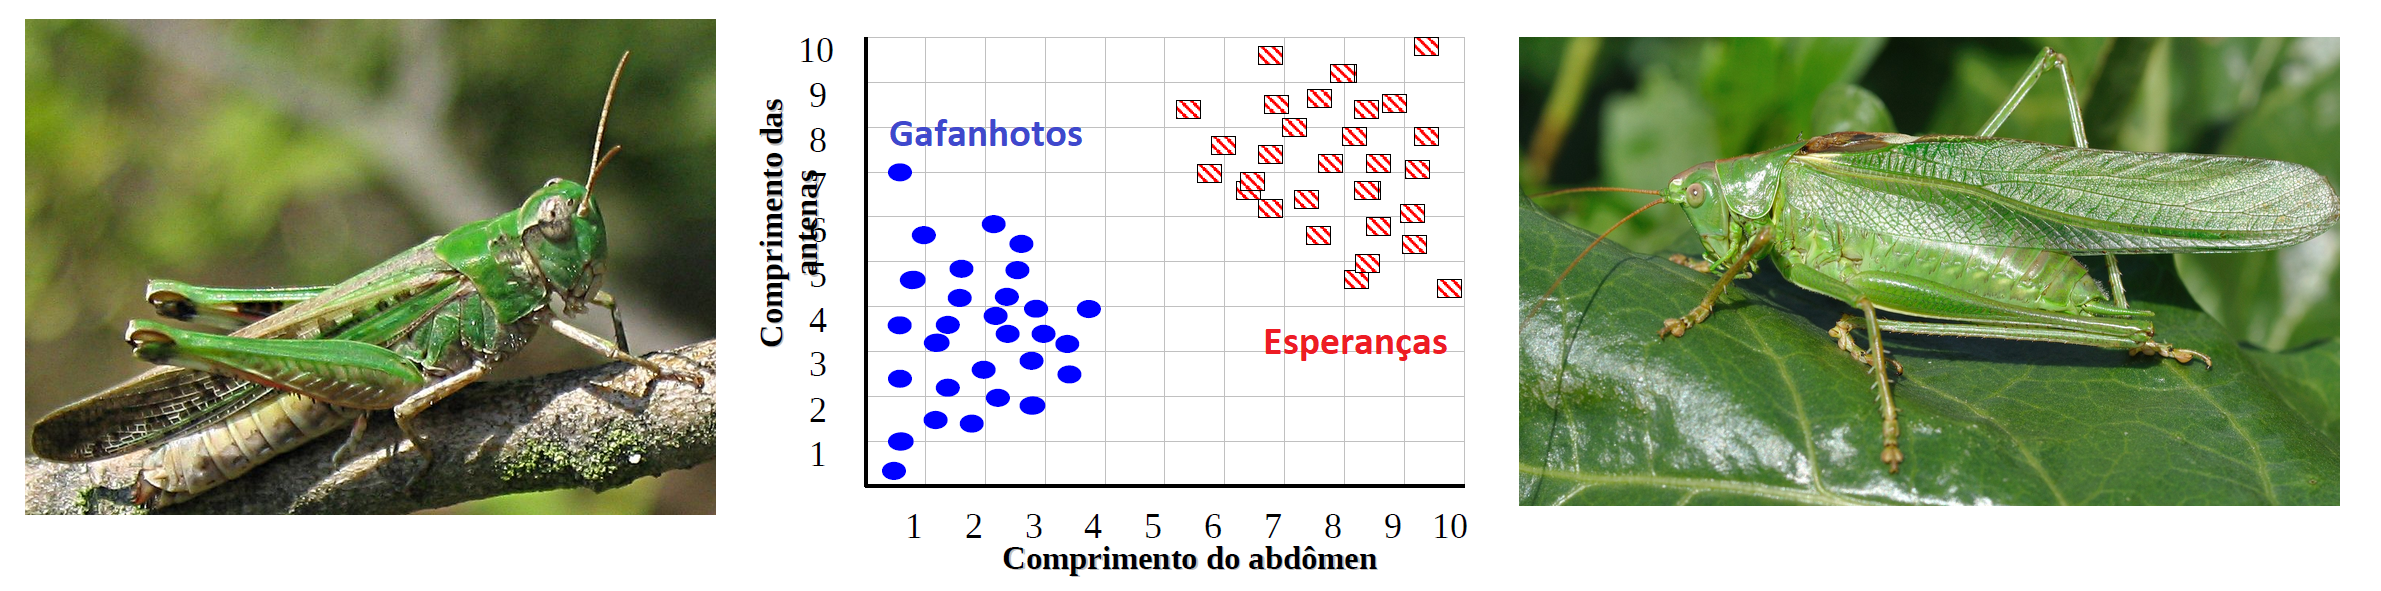

Foram medidos o comprimento das antenas e do abdômen de dois tipos de insetos: gafanhotos e esperanças. 

Carregue os dados do arquivo .csv fornecido e gere estatísticas e gráficos.

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('gaf_esp.csv', sep=';') # Estamos carregando o arquivo csv usando o ; como separador

Os dados carregados no pandas estão em uma estrutura de dados chamada DataFrame. Este é o objeto que o pandas cria para representar os dados da tabela. Como todo objeto em POO (programação orientada à objeto), ele possui métodos que podem ser chamados. 

Para chamar um método de um objeto, basta escrever o nome da variável do objeto e colocar um . (ponto) na frente, evocando na sequência o nome do método seguido de  parenteses (arg), onde os argumentos arg podem ou não ser passados, dependendo do método.

Vejamos dois exemplos de head():

In [ ]:
dados.head() # o número passado para o método head é o número de linhas que queremos ver (por default 5)

In [ ]:
dados.head(10) # passando 10 como argumento do método head

No pandas podemos acessar as colunas através do nome, de forma parecida com um dicionário:

In [ ]:
dados['Espécie']

Vejamos quais são os tipos da estruturas de dados de uma **Tabela Pandas** e de uma **Coluna Pandas**:

In [ ]:
type(dados) # As tabelas dos pandas são objetos chamados de dataframes

In [ ]:
type(dados['Espécie']) # Já as colunas são objetos chamados de séries

Para transformar uma série em uma lista nativa do Python, podemos fazer:

In [ ]:
list(dados['Espécie'])

Agora vamos usar isso para contar quantos exemplos (entradas) temos de cada espécie:

In [ ]:
list(dados['Espécie']).count('Gafanhoto')

In [ ]:
list(dados['Espécie']).count('Esperança')

### Estatísticas

Vamos calcular algumas estatísticas

In [ ]:
import statistics

In [ ]:
media_cab = statistics.mean(dados['Comprimento do Abdômen']) # Média do Comp. Abdômen
media_can = statistics.mean(dados['Comprimento das Antenas']) # Média do Comp. Antena
std_cab = statistics.stdev(dados['Comprimento do Abdômen']) # Desvio Padrão Amostral do Comp. Abdômen
std_can = statistics.stdev(dados['Comprimento das Antenas']) # Desvio Padrão Amostra do Com. Antena

In [ ]:
print('Média Comp. Abdômen: ', media_cab)
print('Média Comp. Antena: ', media_can)
print('Desvio Padrão Amostral do Comp. Abdômen: ', std_cab)
print('Desvio Padrão Amostral do Comp. Antena: ', std_can)

Esses valores foram calculados para todos os dados.

Vamos recalcular para cada uma das espécies.

Para isso, vamos separar os dados em dois dataframes:

In [ ]:
dados_gaf = dados[dados['Espécie']=='Gafanhoto'] # Aqui estamos criando um dataframe só com gafanhotos

In [ ]:
dados_gaf.head()

In [ ]:
dados_esp = dados[dados['Espécie']=='Esperança'] # E aqui um dataframe só com esperanças

In [ ]:
dados_esp.head()

In [ ]:
media_cab_gaf = statistics.mean(dados_gaf['Comprimento do Abdômen']) # Média do Comp. Abdômen
media_can_gaf = statistics.mean(dados_gaf['Comprimento das Antenas']) # Média do Comp. Antena
std_cab_gaf = statistics.stdev(dados_gaf['Comprimento do Abdômen']) # Desvio Padrão Amostral do Comp. Abdômen
std_can_gaf = statistics.stdev(dados_gaf['Comprimento das Antenas']) # Desvio Padrão Amostra do Com. Antena

In [ ]:
print('Média Comp. Abdômen: ', media_cab_gaf)
print('Média Comp. Antena: ', media_can_gaf)
print('Desvio Padrão Amostral do Comp. Abdômen: ', std_cab_gaf)
print('Desvio Padrão Amostral do Comp. Antena: ', std_can_gaf)

In [ ]:
media_cab_esp = statistics.mean(dados_esp['Comprimento do Abdômen']) # Média do Comp. Abdômen
media_can_esp = statistics.mean(dados_esp['Comprimento das Antenas']) # Média do Comp. Antena
std_cab_esp = statistics.stdev(dados_esp['Comprimento do Abdômen']) # Desvio Padrão Amostral do Comp. Abdômen
std_can_esp = statistics.stdev(dados_esp['Comprimento das Antenas']) # Desvio Padrão Amostra do Com. Antena

In [ ]:
print('Média Comp. Abdômen: ', media_cab_esp)
print('Média Comp. Antena: ', media_can_esp)
print('Desvio Padrão Amostral do Comp. Abdômen: ', std_cab_esp)
print('Desvio Padrão Amostral do Comp. Antena: ', std_can_esp)

### Gráficos

Vamos começar plotando os histogramas usando o Seaborn e o Matplotlib:

In [ ]:
import matplotlib.pyplot as plt  
import seaborn as sns

In [ ]:
fig = plt.figure(figsize=(14, 40), dpi=80, fontsize=20)
fig.suptitle('Todos os Dados')


sns.histplot(ax=axes[0],
            data=dados['Comprimento do Abdômen'],  # Perceba que estamos passando a coluna do dataframe completo
            kde=True,
            bins=10,
            linewidth=0.7,
            )

sns.histplot(ax=axes[1],
            data=dados['Comprimento das Antenas'],
            kde=True,
            bins=10,
            linewidth=0.7,
            )

axes[0].set(xlabel='Comprimento do Abdômen', ylabel='Contagem')
axes[1].set(xlabel='Comprimento das Antenas', ylabel='Contagem')

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Dados dos Gafanhotos')


sns.histplot(ax=axes[0],
            data=dados_gaf['Comprimento do Abdômen'], # Agora a coluna do dataframe só com gafanhotos
            kde=True,
            bins=10,
            linewidth=0.7,
            color='green'
            )

sns.histplot(ax=axes[1],
            data=dados_gaf['Comprimento das Antenas'],
            kde=True,
            bins=10,
            linewidth=0.7,
            color='green'
            )

axes[0].set(xlabel='Comprimento do Abdômen', ylabel='Contagem')
axes[1].set(xlabel='Comprimento das Antenas', ylabel='Contagem')

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Dados das Esperanças')


sns.histplot(ax=axes[0],
            data=dados_esp['Comprimento do Abdômen'],
            kde=True,
            bins=10,
            linewidth=0.7,
            color = 'red'
            )

sns.histplot(ax=axes[1],
            data=dados_esp['Comprimento das Antenas'],
            kde=True,
            bins=10,
            linewidth=0.7,
            color = 'red'
            )

axes[0].set(xlabel='Comprimento do Abdômen', ylabel='Contagem')
axes[1].set(xlabel='Comprimento das Antenas', ylabel='Contagem')

Vamos ver um boxplot:

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Dados das Esperanças')

sns.boxplot(x="Espécie", y="Comprimento do Abdômen",
            palette=["g", "r"],
            linewidth=0.7,
            ax=axes[0],
            data=dados
           )

sns.boxplot(x="Espécie", y="Comprimento das Antenas",
            palette=["g", "r"],
            linewidth=0.7,
            ax=axes[1],
            data=dados
           )

Vamos ver agora um gráfico de dispersão do Comprimento das Antenas em função do Comprimento do Abdômen. Vamos adicionar os histogramas de cada variável na lateral do eixo correspondente. Também vamos indicar para o método do Seaborn que existem duas espécies.

In [ ]:
sns.jointplot(data=dados,
              x="Comprimento do Abdômen", y="Comprimento das Antenas",
              height=5, 
              ratio=2,
              marginal_ticks=True,
              hue = 'Espécie'
             )

----------------------
## Exemplo 2 - Botânica: Íris Dataset

Esse dataset contém medidas da largura e comprimento da pétala e da sépala de **150 amostras** de flores, assim como a espécie de cada uma (*versicolor*, *setosa*, *virginica*). Mais informações: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html.

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" alt="dieta" width="600px">

Dentro da biblioteca Scikit Learn há bases da dados prontas utilizadas para exemplos e testes.

Vamos importar essa base dados usando o comando:

In [ ]:
from sklearn import datasets

Agora vamos carregar os dados do dataset Iris:

In [ ]:
# Carregando os dados
iris = datasets.load_iris()

In [ ]:
# Dê um print(iris) para ver como os dados estão estruturados nessa variável (objeto)
# Perceba que é parecido com um dicioário nativo do Python

In [ ]:
type(iris) # Entretanto, para saber qual a 'estrutura de dados' da variável iris corretamente

In [ ]:
iris.keys() # Para saber as 'chaves'

In [ ]:
iris['feature_names'] # Acessar como em um dicionário

In [ ]:
iris.feature_names # Acessar como atributo de um objeto

Para facilitar a visualização dos dados, vamos usar o pandas.

Para isso, vamos criar um dataframe pandas que recebe como dados os atributos do objeto iris que criamos acima.

In [ ]:
import pandas as pd

In [ ]:
dados = pd.DataFrame(data=iris.data,  # Estamos dizendo que o dados do dataframe são o atributo data do objeto iris
                     columns = iris.feature_names) # Já o nome das colunas do dataframe serão o atrib feature_names

In [ ]:
dados.head() # Para vermos as linhas do dataframe (o número passado no head será o número de linhas printadas)

Vamos adicionar a essa tabela, os correspondentes nomes das flores 

In [ ]:
dados['flower'] = iris.target

In [ ]:
dados.head()

Neste dataset, cada número corresponde a uma classe de flor. Vamos transformar para aparecer o nome de cada uma. Para isso faremos uma função que irá mapear os nomes de acordo com os números. Vamos aplicar a função sobre uma coluna inteira do nosso dataframe.

In [ ]:
iris.target_names  # Aqui estamos vendo os nomes que vem junto com o dataset

In [ ]:
# Aqui estamos criando uma funcao que recebe o número da classe e retorna o nome correspondente
def mapear_nomes(numero_classe):
    flower_map = {
        0:iris.target_names[0],
        1:iris.target_names[1],
        2:iris.target_names[2]
    }
    return(flower_map[numero_classe])

In [ ]:
# O pandas permite que nos apliquemos uma função para todas as entradas de uma coluna
# Observe que prático é aplicar a função mapear_nomes sobre todos os valores na células da coluna 'flower'
# O resultado está sendo passado para uma nova coluna, chamada 'flower_name'

dados['flower_name'] = dados['flower'].apply(mapear_nomes)

In [ ]:
dados.head(3)

Vamos jogar fora a coluna **flower** uma vez que agora temos o nome da classe em outra coluna.

In [ ]:
dados = dados.drop(columns=['flower'])

In [ ]:
dados.head(3)

### Informações técnicas sobre os dados

O método **.info()** do pandas nos diz quais são os tipos de dados que temos em cada coluna, a quantidade de linhas não nulas e quanto espaço na memória do computador (RAM) nosso dataframe está ocupando:

In [ ]:
dados.info()

### Estatísticas

O método **.describe()** do pandas nos gera estatísticas básicas de todas as colunas do dataframe:

In [ ]:
dados.describe()

### Contando ocorrências de dados categóricos

In [ ]:
dados.flower_name.value_counts()['Setosa']

In [ ]:
dados.flower_name.value_counts()['Versicolor']

In [ ]:
dados.flower_name.value_counts()['Virginica']

### Gráficos

O métodos **.hist()** do pandas nos gera os histogramas de todas as colunas com dados numéricos.

Você pode olhar aqui https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.DataFrame.hist.html para saber como passar parâmetros neste método de forma a controlar o design do gráfico.

In [ ]:
dados.hist()

Já o método **.boxplot()** gera diagramas de caixa dos dados numéricos:

In [ ]:
dados.boxplot()

O método **.plot.scatter()** gera gráficos de dispersão. Como os gráficos de dispersão são 2D, isto é, tem dois eixos, um x e outro y, precisamos especificar qual coluna do nosso dataframe será o x e qual coluna será o y.

Vejamos o exemplo:

In [ ]:
dados.plot.scatter(x='sepal length (cm)',
                   y='sepal width (cm)'
                  )

In [ ]:
# Podemos repetir o procedimento para cada dispersão que queremos ver
dados.plot.scatter(x='petal length (cm)', y='petal width (cm)')

Nós também podemos fazer os mesmos gráficos que fizemos utilizando métodos nativos do **pandas** usando métodos do **seaborn**.

Vejamos os exemplos:

In [ ]:
import seaborn as sns

In [ ]:
# Histogramas
sns.histplot(data=dados)

In [ ]:
# Boxplot
sns.boxplot(data=dados)

O Seaborn tem um método bastante interessante que plota todas as dispersões e todas as distribuições.

Perceba que o parâmetro **hue** recebe o nome da coluna de classe. Ele irá pintar cada ponto de acordo com o tipo de flor.

Vejamos:

In [ ]:
sns.pairplot(dados, hue='flower_name')

-------------------------

## Exercício - Íris Data set

Nas **estatísticas** e **plots** que realizamos no exemplo 2, os dados foram considerados sobre todos os tipos de flores. Considere agora separar os dados em 3 dataframes diferentes, cada um com um tipo de flor. Refaça as estatísticas e plote novos gráficos para cada um dos dataframes.

Você é capaz de propor um método de classificação das flores a partir da análise dos dados?

In [ ]:
## Colorar código a partir daqui